# **VW05p_Enrichement**


# **Tóm tắt đề**:

Cho ma trận có kích thước $ n \times m $, tìm ma trận con có kích thước $ 3 \times 3 $ sao cho tổng các phần tử là nhỏ nhất.

# **Thuật toán**:

Duyệt qua tất cả các ma trận con có kích cỡ $ 3 \times 3 $ và tìm ma trận con có tổng nhỏ nhất.

# **Tags**: 
Brute force, Implementation

In [4]:
n, m = map(int, input().split())
a = []

for i in range(n):
    r = list(map(int, input().split()))
    a.append(r)

ans = 1000000000

for i in range(n - 2):
    for j in range(m - 2):
        sum = 0
        for k in range(9):
            sum += a[i + k // 3][j + k % 3]
        ans = min(ans, sum)

print(ans)

5 7
10 2 3 7 10 4 8
3 2 1 9 6 2 1
0 3 6 7 8 9 10
5 4 3 0 2 1 8
9 2 3 10 6 4 8
27




*   **Note:** Cách cài đặt sử dụng python cho bài này cũng như các bài khác hiện chưa được tối ưu về mặt bộ nhớ cũng như thời gian. Python xử lý khá chậm so với C++ nên chưa thể pass được toàn bộ các test cases.

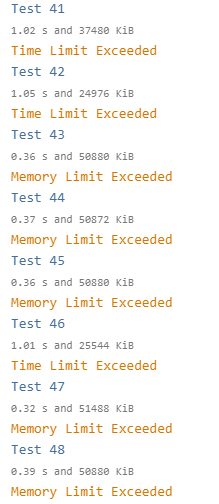


# **VW04p_Checkout**


# **Tóm tắt đề**:

Khoảng cách giữa hai ga A và B là $ d $. Tàu tăng tốc với gia tốc $ a_{1} $ để tăng tốc từ $ 0 $ tới vận tốc nào đó không vượt quá $ v $ rồi chạy tốc độ này trong khoảng thời gian không ít hơn $ t $, sau đó, giảm tốc độ với gia tốc $ a_{2} $ để dừng lại tại ga B. Tìm khoảng thời gian ngắn nhất để đi từ A tới B.

# **Thuật toán**:

Tìm $ max(v) $ sao cho không vượt quá $ v $ giới hạn của đề bài để khoảng thời gian đi được là ngắn nhất.

# **Tags**: 
Maths

In [12]:
import math
d, a1, a2, v, t = map(float, input().split())

a = -(1 / (2 * a1) + 1 / (2 * a2))
de = t * t - 4 * a * d
x1 = (t + math.sqrt(de)) / (2 * a)
x2 = (t - math.sqrt(de)) / (2 * a)

v = min(v, max(x1, x2))
res = v / (2 * a1) + v / (2 * a2) +  d / v
print(round(res, 12))

20.5 0.5 0.6 3 7.5
14.373007108234


# **VW07p_Vitamin**



# **Tóm tắt đề**:

Một máy sản xuất vitamin liên tục trong $ n $ giờ thì giờ thứ $ i $ cho $ a_{i} $ đơn vị vitamin, nếu máy ngừng hoạt động lâu hơn $ 1 $ giờ thì lượng vitamin cho ra ở mỗi giờ thứ $ i $ sẽ được bắt đầu lại từ $ a_{1}, a_{2}, a_{3},... $. Xác định thời gian ít nhất để tạo ra được $ x $ đơn vị vitamin hoặc cho biết không có cách nào để sản xuất được $ x $ đơn vị vitamin ấy.

# **Thuật toán**:

1.   Gọi $ f_{c} $ là thời gian ngắn nhất để sản xuất $ c $ đơn vị vitamin; $ s_{i} $ là tổng lượng vitamin nhận được khi chạy tới giờ thứ $ i $. Ban đầu, $ f_{i} = +\infty $ và $ s_{i} = s_{i-1} + a_{i} $.
2.   Xét 2 trường hợp:

*   TH1: Máy đang cần sản xuất c đơn vị vitamin và phải chạy trong $ i $ giờ liên tục rồi tạm nghỉ trong $ 1 $ giờ ($ 1 \le i \le n $).

    * Lượng vitamin còn lại cần phải sản xuất tiếp: $ c - s_{i} $
    * Số giờ tốn cho việc sản xuất và tạm nghỉ: i + 1
    
    => Công thức quy hoạch động: $ f_{c} = min(f_{c}, f_{c - s_{i}} + i + 1) $
*   TH2: Máy đang cần sản xuất c đơn vị vitamin và phải chạy trong $ n + k $ giờ liên tục rồi tạm nghỉ trong $ 1 $ giờ.
    * Ta nhận thấy để tối ưu thì ta chỉ cần sản xuất tới khi nào tổng lượng vitamin không vượt quá $ c $, vì vậy, ta cần chọn $ max(k) $ sao cho $ s_{n} + k \times a_{n} \le c $
    * $ max(k) $ thỏa $ s_{n} + k \times a_{n} \le c $: $ k = \lfloor {\frac{c-s_{n}}{a_{n}}} \rfloor $
    * Lượng vitamin còn lại cần phải sản xuất tiếp: $ c - s_{n} - k \times a_{n} $
    * Số giờ tốn cho việc sản xuất và tạm nghỉ: $ n + k + 1 $

    => Công thức quy hoạch động: $ f_{c} = min(f_{c}, f_{c - s_{n} - k \times a_{n}} + n + k + 1) $

# **Tags**: 
Dynamic Programming

In [5]:
n, x = map(int, input().split())

a = list(map(int, input().split()))
s = [0 for i in range(n)]
f = [1000000000 for i in range(x + 1)]

for i in range(n):
    if (i > 0):
        s[i] = s[i - 1] + a[i]
    else:
        s[i] = a[i]

f[0] = -1

for c in range(x + 1):
    for i in range(n):
        if (s[i] <= c):
            f[c] = min(f[c], f[c - s[i]] + i + 2)
            if (i == n - 1):
                k = c - s[n - 1]
                f[c] = min(f[c], f[c - (s[n - 1] + k * a[n - 1])] + n + k + 1)

if (f[x] == 1000000000):
    print(-1)
else:
    print(f[x])

5 12
1 4 2 6 3
6
